<a href="https://colab.research.google.com/github/Andrew-Hess/Computing_github/blob/main/Project3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: machine learning analysis of a superconductors' database


In this project you will greatly expand your familiarity with machine learning applications to scientific problems, by exploring a large dataset of superconducting materials, i.e. materials that conduct electricity without resistance.

The specific datasets of interest for this project, *train* and *unique_m* are available in CSV format in the Canvas module dedicated to this project. You can find the full code and documentation [here](https://github.com/khamidieh/predict_tc). This GitHub repository is the computational basis of the paper [A Data-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor](https://arxiv.org/abs/1803.10260) by Kam Hamidieh. 


The dataset *unique_m* contains , for each row, the chemical formula of several superconducting materials, and the critical temperature at which they manifest superconducting properties. The chemical formula is broken up in a row of concentrations associated to each chemical element in the material.

The dataset *train* contains in each row a list of relevant chemical properties that can be calculated from first principles for the materials (and the critical temperature as well).

(1) Create training and testing datasets by generating two random subsets of the rows of the dataset *train* (excluding the critical temperature values). Create corresponding training and testing targets of critical temperatures.

Use the *regressors* of *scikit-learn* to generate machine learning predictors of the critical temperature. Evaluate the accuracy of your predictions.

(2) Repeat the steps in (1), but by substituting the *train* dataset with the dataset *unique_m*. 

(3) Compare the accuracy of the results you get in (1) and (2) and comment on your results.

(4) Repeat the analysis in (1)-(3), but replacing the regressors from *scikit-learn* with the corresponding deep learning neural network regressors that you can build with the Keras and TensorFlow Python packages. Refer to [this Jupyter notebook tutorial](https://www.tensorflow.org/tutorials/keras/regression) to learn how to build regressors in Keras.

(5) Search the literature to find out what is the current state of machine learning approaches to the estimation of  superconductors' critical temperatures. Compare with your results for this project and suggest possible improvements to your code. 

 


N. B. the basic structure for this project is the same as the one for HW4 (outlined in HW4_Question1_template and HW4_Question2_template). Just remember that the work you did for HW4 was about *classifiers*, while here you will be working with *regressors*. The main difference is that your targets will take continuous values when you are building a regressor (as opposed to discrete, categorical values for classifiers). 

N. B. 2 after you import your csv data sets, and after you convert them in numpy arrays (that start with index 0!), change the critical temperature of row 20573 to 60. There is a typo in the dataset.

This is a [very basic tutorial](https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial) on (linear) regression with scikit-learn, and this is [a more complete tutorial](https://developer.ibm.com/tutorials/learn-regression-algorithms-using-python-and-scikit-learn/) that lists several possible regressors in scikit-learn.  

In [ ]:
#This is one project that is best done working on Colab.
# You will need the following two lines when reading files from your
# Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project3/train.csv')
y_df = np.array(train["critical_temp"]) #critical temp
x_df = train.iloc[:,:-1] #everything else
y_df[20573] = 60 #fix mistake in code

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2,random_state=1)

0.7259853810482528


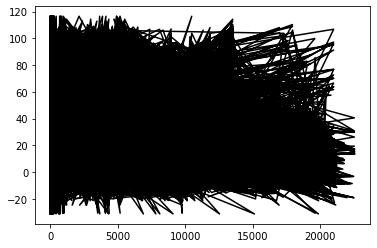

In [ ]:
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))
y_pred = regr.predict(x_test)
plt.plot(x_test, y_pred, color ='k')
plt.show()

In [ ]:
import plotly.express as px
from sklearn.datasets import load_iris
LR_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
LR_df.head()
fig = px.scatter(LR_df, x="Actual", y="Predicted",trendline="ols")
fig.show()